# LINEAR REGRESSION

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
RANDOM_SEED = 123 # for reproducability
NUMBER_OF_SAMPLES = 100 # you can change the number of samples

np.random.seed(RANDOM_SEED)

In [11]:
# function to generate random samples
# - We generate a random sample and add some noise to it
def generate_data(number_of_samples):
    x = np.array(range(number_of_samples))
    noise = np.random.uniform(0,200,number_of_samples)
    y = 3.2 * x + noise
    return x,y


In [12]:
data = generate_data(NUMBER_OF_SAMPLES)
data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([139.29383712,  60.42786699,  51.77029071, 119.86295382,
        156.69379396, 100.62129202, 215.35283968, 159.36594772,
        121.7863803 , 107.22350364, 100.63560323, 181.00994148,
        126.11444894,  53.53557932, 124.40885107, 195.59908115,
         87.69834609,  89.49035123, 163.91027477, 167.16551742,
        190.88019171, 237.08635882, 215.29106497, 195.80470214,
        221.28867651, 144.59178277, 155.55773112, 132.05264618,
        148.34280928, 218.99522477, 114.42098799, 185.94023454,
        188.57255267, 204.33701953, 19

In [13]:
# Convert the resultant array into a dataframe
data = np.vstack(data).T

data_df = pd.DataFrame(data, columns=['X','Y'])

In [14]:
data_df

,X,Y
0,0.0,139.293837
1,1.0,60.427867
2,2.0,51.770291
3,3.0,119.862954
4,4.0,156.693794
...,...,...
95,95.0,442.340360
96,96.0,337.425490
97,97.0,390.175259
98,98.0,361.771180


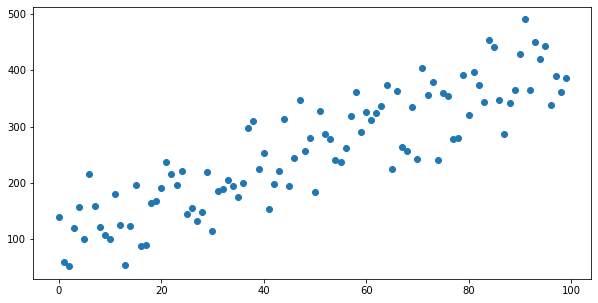

In [15]:
plt.figure(figsize=(10,5))

plt.scatter(data_df['X'], data_df['Y'])
plt.show()

In [16]:
# Function we will use to normalize (Z Score normalization)
def normalize(data):
    return (data - data.mean())/data.std()

In [17]:
# Shuffle the data
indices = list(np.arange(NUMBER_OF_SAMPLES))
np.random.shuffle(indices)

# train_test_split
TRAIN_SIZE = 0.6
EVAL_SIZE = 0.2
TEST_SIZE = 0.2
TRAIN_LENGHT = int(len(indices)*TRAIN_SIZE)
EVAL_STOP = int(len(indices)*EVAL_SIZE)+TRAIN_LENGHT

X = data_df['X'][indices]
Y = data_df['Y'][indices]

X_train, Y_train = X[0:TRAIN_LENGHT] , Y[0:TRAIN_LENGHT]
X_eval, Y_eval = X[TRAIN_LENGHT:EVAL_STOP], Y[TRAIN_LENGHT : EVAL_STOP]
X_test, Y_test = X[EVAL_STOP: ] , Y[EVAL_STOP:]

In [18]:
X_train.shape

(60,)

In [19]:
#Normalize the data
X_train, X_eval, X_test = normalize(X_train), normalize(X_eval), normalize(X_test)
Y_train, Y_eval, Y_test = normalize(Y_train), normalize(Y_eval), normalize(Y_test)

In [20]:
# Mean ~0 and STD ~1
print(round(X_train.mean(),4) , round(X_train.std(),4) )

-0.0 1.0


Our goal is to model for a value y that is a function of a value <font color='orange'>X </font>, a bias <font color='orange'>c</font> and a weight <font color='orange'>m </font>  <br>
$y = mX + c$

In [21]:
print(X_train.shape, Y_train.shape)

(60,) (60,)


In [22]:
X_train.ndim

1

In [25]:
# We are trying to get the features in X_train which in our case is just 1
# X_train.shape[1] # Returns an error

In [28]:
try:
    INPUT_DIM =  X_train.shape[1] 
    OUT_DIM =  Y_train.shape[1]
except IndexError:
    INPUT_DIM =  1
    OUT_DIM =  1   
    
# You could also reshape X_train and Y_train at this point
    
INPUT_DIM =  X_train.ndim
OUT_DIM =  Y_train.ndim 

In [39]:
# Initialize random weights
m = 0.04 * np.random.randn(INPUT_DIM , OUT_DIM )
c = np.zeros((1, 1))

print("m : ", m ," shape : ",m.shape, "\nc : ", c)

m :  [[0.07423953]]  shape :  (1, 1) 
c :  [[0.]]


In [33]:
# Comment out to observe returned error : Value Error
# y_pred = np.dot(X_train, m)+b

In [41]:
X_train = np.array(X_train).reshape(X_train.shape[0], 1)
X_eval = np.array(X_eval).reshape(X_eval.shape[0], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], 1)
Y_train = np.array(Y_train).reshape(Y_train.shape[0], 1)
Y_eval = np.array(Y_eval).reshape(Y_eval.shape[0], 1)
Y_test = np.array(Y_test).reshape(Y_test.shape[0], 1)

X_train.shape

(60, 1)

In [42]:
# Dot matrix  Nx1 by 1x1 = Nx1 
y_pred = np.dot(X_train, m)+c

# y_pred

In [43]:
# Error
# We will use: Mean Squared Error
np.sum((Y_train - y_pred)**2)/len(Y_train)

0.8606934544361307

## Gradients
Now , the gradient is the rate of change of weights.<br>
So we adjust weights to fit our data better. Therefore we take a look at the rate of change for both <font color='orange'>_m_ </font>and 
    <font color='orange'>_b_ </font> <br>
We differentiate the loss function, normaly we add the change to MAXIMIZE, but here we will subtract the change since we want to MINIMIZE the loss <br>
We will differentiate our mean squared error function <font color='orange'> _np.sum((Y_train - y_pred)**2)/len(Y_train)_ </font><br>
<br>
For differantiation recall  <font color='orange'> _ypred = mX + c_ </font> <br>
dm for ypred = X (which is the coefficient of mX or Xm ) , X in our case is X_train<br>
dc for ypred = 1 (which is the coefficient of C) <br>
len(Y_train) is a constant not a function

In [44]:
# Backpropagation    

dm = - 2*np.sum((Y_train - y_pred)*X_train)/len(Y_train)
dc = - 2*np.sum((Y_train - y_pred)*1)/len(Y_train)

The weights are updated using a learning rate (prefferably small)<br>
The learning rate are like the fraction of the change by which to adjust

In [45]:
LEARNING_RATE = 1e-1

In [46]:
# We add the change
# - We multiply by -ve because we are minimising
m += - LEARNING_RATE * dm  
c += - LEARNING_RATE * dc

We repeat the above steps to train our data and minimize error

In [47]:
EPOCHS = 100

In [48]:
for epoch_num in range(EPOCHS+1):
    y_pred = np.dot(X_train, m)+c
    
    #loss
    loss = (np.sum((Y_train - y_pred)**2))/len(Y_train)
    
    #print progress
    if epoch_num % 10 == 0:
        print(f'Epoch : {epoch_num}  Loss : {loss}')
    
    #update weights
    dm = - 2*np.sum((Y_train - y_pred)*X_train)/len(Y_train)
    dc = - 2*np.sum((Y_train - y_pred)*1)/len(Y_train)
    
    m += - LEARNING_RATE * dm  
    c += - LEARNING_RATE * dc

Epoch : 0  Loss : 0.6359015440367835
Epoch : 10  Loss : 0.23198667111917926
Epoch : 20  Loss : 0.2269260292754207
Epoch : 30  Loss : 0.22686262458896825
Epoch : 40  Loss : 0.22686183019284456
Epoch : 50  Loss : 0.2268618202398705
Epoch : 60  Loss : 0.22686182011516987
Epoch : 70  Loss : 0.22686182011360748
Epoch : 80  Loss : 0.22686182011358788
Epoch : 90  Loss : 0.2268618201135876
Epoch : 100  Loss : 0.22686182011358766


### Predictions

In [49]:
pred_train = m*X_train+c 
pred_test = m*X_test+c

In [50]:
#Error
train_error = np.mean((Y_train-pred_train)**2)
test_error = np.mean((Y_test-pred_test)**2)

In [51]:
print(f'Train Data Error : {train_error} \nTest Data Error : {test_error}')

Train Data Error : 0.2268618201135876 
Test Data Error : 0.26140836267113876


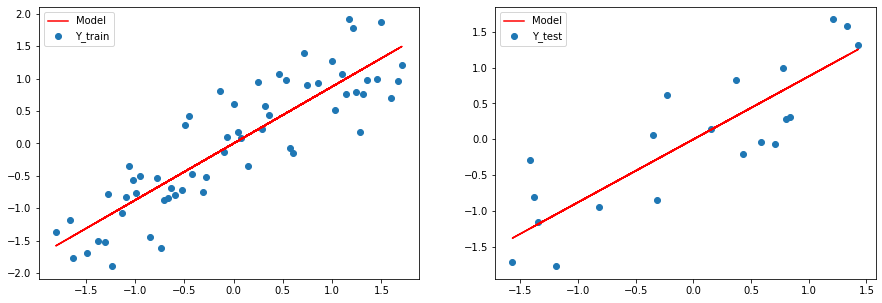

In [52]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(X_train,Y_train, label = 'Y_train')
plt.plot(X_train,pred_train,color='red', label='Model')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X_test,Y_test, label = 'Y_test')
plt.plot(X_test,pred_test,color='red', label='Model')
plt.legend()

plt.show()

In [53]:
# Unscale weights
m_unscaled = m * (Y.std()/X.std())
c_unscaled = c * Y.std() + Y.mean() - np.sum(m_unscaled*X.mean())
print ("[actual] y = 3.2X + noise")
print (f"[model] y_hat = {m_unscaled[0][0]:.1f}X + {c_unscaled[0][0]:.1f}")

[actual] y = 3.2X + noise
[model] y_hat = 3.2X + 102.0


--------
### Linear Algebra code with Numpy Attributed to : <font color= 'orange'>Goku Mohandas <br>
---------

### Now using sklearn

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [56]:
model.coef_

array([[0.87709353]])

In [57]:
round(model.intercept_[0])

0.0

In [58]:
#predict
sklearn_test_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error as mse # mse is just an alias

In [60]:
mse(Y_test,sklearn_test_pred)

0.26140836267884165

_

_

_

# MULTIVARIATE LINEAR REGRESSION
#### We will use ordinary least squares method

In [61]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0) 
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [62]:
import statsmodels.api as sm

C:\Users\Aseta\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [63]:
y = df.Employed  # response
X = df[['GNP.deflator','GNP','Unemployed','Armed.Forces','Population','Year']]  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

,const,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year
1947,1.0,83.0,234.289,235.6,159.0,107.608,1947
1948,1.0,88.5,259.426,232.5,145.6,108.632,1948
1949,1.0,88.2,258.054,368.2,161.6,109.773,1949
1950,1.0,89.5,284.599,335.1,165.0,110.929,1950
1951,1.0,96.2,328.975,209.9,309.9,112.075,1951


In [64]:
est=sm.OLS(y, X) 
est = est.fit()
est.summary()

C:\Users\Aseta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           4.98e-10
Time:                        14:38:10   Log-Likelihood:                0.90665
No. Observations:                  16   AIC:                             12.19
Df Residuals:                       9   BIC:                             17.59
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3482.2586    890.420     -3.911      0.004   -5496.529   -1467.988
GNP.deflator     0.0151      0.085      0.177      0.863      -0.177       0.207
GNP             -0.0358      0.033     -1.070      0.313      -0.112       0.040
Unemployed      -0.0202      0.005     -4.136      0.003      -0.031      -0.009
Armed.Forces    -0.0103      0.002     -4.822      0.001      -0.015      -0.005
Population      -0.0511      0.226     -0.226      0.826      -0.563       0.460
Year             1.8292      0.455      4.016      0.003       0.799       2.860
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.559
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.684
Skew:                           0.420   Prob(JB):                        0.710
Kurtosis:                       2.434   Cond. No.                     2.38e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
est.params

const          -3482.258635
GNP.deflator       0.015062
GNP               -0.035819
Unemployed        -0.020202
Armed.Forces      -0.010332
Population        -0.051104
Year               1.829151
dtype: float64

| Element | Description |
|---------|------------|
|Dep. Variable | Which variable is the response in the model |
|Model |	What model you are using in the fit |
|Method | How the parameters of the model were calculated |
|No. Observations | The number of observations (examples) |
|DF Residuals | Degrees of freedom of the residuals. Number of observations – number of parameters |
|DF Model | Number of parameters in the model (not including the constant term if present) |
|R-squared | The coefficient of determination. A statistical measure of how well the regression line approximates the real data points |
|Adj. R-squared	| The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals |
|F-statistic | A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals | 
|Prob (F-statistic)	| The probability that you would get the above statistic, given the null hypothesis that they are unrelated | 
|Log-likelihood	| The log of the likelihood function. | 
|AIC | The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. |
|BIC | The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. |
| |	The name of the term in the model |
|coef | The estimated value of the coefficient |
|std err | The basic standard error of the estimate of the coefficient. More sophisticated errors are also available. | 
|t |	The t-statistic value. This is a measure of how statistically significant the coefficient is. |
|P > |t| | P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that  there is a statistically significant relationship between the term and the response.|
|[95.0% Conf. Interval]	| The lower and upper values of the 95% confidence interval |
| Skewness | A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). |
|Kurtosis |	A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails). |
|Omnibus |	D’Angostino’s test. It provides a combined statistical test for the presence of skewness and kurtosis. |
| Prob(Omnibus) |	The above statistic turned into a probability |
| Jarque-Bera |	A different test of the skewness and kurtosis |
| Prob (JB) | The above statistic turned into a probability |
| Durbin-Watson	| A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis |
| Cond. No | A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other). |


In [66]:
X

,const,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year
1947,1.0,83.0,234.289,235.6,159.0,107.608,1947
1948,1.0,88.5,259.426,232.5,145.6,108.632,1948
1949,1.0,88.2,258.054,368.2,161.6,109.773,1949
1950,1.0,89.5,284.599,335.1,165.0,110.929,1950
1951,1.0,96.2,328.975,209.9,309.9,112.075,1951
1952,1.0,98.1,346.999,193.2,359.4,113.270,1952
1953,1.0,99.0,365.385,187.0,354.7,115.094,1953
1954,1.0,100.0,363.112,357.8,335.0,116.219,1954
1955,1.0,101.2,397.469,290.4,304.8,117.388,1955
1956,1.0,104.6,419.180,282.2,285.7,118.734,1956


In [67]:
X*est.params

,const,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year
1947,-3482.258635,1.250135,-8.392040,-4.759661,-1.642831,-5.499211,3561.357902
1948,-3482.258635,1.332976,-9.292426,-4.697034,-1.504378,-5.551541,3563.187053
1949,-3482.258635,1.328457,-9.243282,-7.438486,-1.669695,-5.609851,3565.016205
1950,-3482.258635,1.348038,-10.194103,-6.769790,-1.704824,-5.668927,3566.845356
1951,-3482.258635,1.448952,-11.783615,-4.240462,-3.201970,-5.727493,3568.674507
1952,-3482.258635,1.477570,-12.429219,-3.903084,-3.713417,-5.788562,3570.503659
1953,-3482.258635,1.491125,-13.087791,-3.777830,-3.664856,-5.881776,3572.332810
1954,-3482.258635,1.506187,-13.006374,-7.228382,-3.461310,-5.939268,3574.161962
1955,-3482.258635,1.524261,-14.237013,-5.866747,-3.149275,-5.999009,3575.991113
1956,-3482.258635,1.575472,-15.014684,-5.701089,-2.951929,-6.067795,3577.820265


In [68]:
z = (X*est.params).sum(axis=1)
z

1947    60.055660
1948    61.216014
1949    60.124713
1950    61.597115
1951    62.911285
1952    63.888311
1953    65.153049
1954    63.774180
1955    66.004695
1956    67.401606
1957    68.186269
1958    66.552055
1959    68.810550
1960    69.649671
1961    68.989068
1962    70.757758
dtype: float64

In [69]:
y

1947    60.323
1948    61.122
1949    60.171
1950    61.187
1951    63.221
1952    63.639
1953    64.989
1954    63.761
1955    66.019
1956    67.857
1957    68.169
1958    66.513
1959    68.655
1960    69.564
1961    69.331
1962    70.551
Name: Employed, dtype: float64

In [71]:
# Error ; MSE
np.sum((y-z)**2)/len(z)

0.05227650346917435